In [2]:
import pandas as pd
import geobr
import matplotlib.pyplot as plt

### essa é a tabela ja tratada que bruno fez, ele apafou as primeiras linhas que eram inuteis ai conseguiu gerar um dataframe que fisesse sentido porque depois de converter pra formato csv ele fica com uma formatação incorreta apresentando varios erros 

#### o metodo que bruno usou pra fazer a formatação correta foi converter a planilha pro formato csv, depois ele observou que como a planilha ta estruturada, apos a converção isso fazia com que varias linhas e colunas fossem clonadas, então ele apafou as linhas clonadas, que no caso eram as primeiras, não lemrbo bem se eram 4 ou 5.

#### apos isso o dataframe ja fica nesse formato mais correto e o proximo passo e cortar as partes que são interessante. no caso desse datrafreme seria o caso que recortar as primeiras 6 colunas porque elas tem informações importantes como o Ano, Região,UD, Codigo do Municipio, Nome do municipio, Localização. Essas colunas recortadas seriam salvas em um novo dataframe. apos isso deveriaam ser recortadas as colunas que representavam os dados relacionados à taxa de abandono, esse recorte seria salvo em um outro dataframe.

#### apos essa etapa os dois datafremes que contem as partes resortadas deveriam ser unidos criando um dataframe que contem os dados que a gente realmente vai usar.

#### ainda não fiz essa parte 

______________________________________________________________________________________________________________________________________________________________________________________________

##  * Conversor da tabela do tipo xlsx para o tipo csv

In [31]:
# Carregar a planilha ignorando estilos
df = pd.read_excel("rendimento_escolar/planilhasTaxaMunicipuos/tx_rendimento_municipios_2011.xls", sheet_name=0, engine='xlrd',skiprows=3)
# Renomear colunas removendo Unnamed
df.columns = df.iloc[0]  # Definir a primeira linha como cabeçalho
# Garantir que os nomes das colunas sejam strings
df.columns = df.columns.astype(str)

# Remover colunas que têm "Unnamed"
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

df = df[1:].reset_index(drop=True)  # Remover a linha duplicada e resetar o índice
df.fillna(method="ffill", inplace=True)
df.to_csv("dados_limpos2011.csv", index=False, encoding="utf-8")


C:\Users\thiago.raimundo\AppData\Local\Temp\ipykernel_7500\2936031259.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


### essa parte eu não sei se precisa aplicar porque é o tratamento que eu tava usando mas se não me engano bruno fez na mão apagando as linhas inuteis direto da tabela

In [3]:
df3 = pd.read_csv("dadosLimpos/dados_limpos2013.csv")  # Pulando as 3 primeiras linhas descritivas

df3

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_8700\1984165564.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("dadosLimpos/dados_limpos2013.csv")  # Pulando as 3 primeiras linhas descritivas


,Ano,Região,UF,Código do Município,Nome do Município,Localização,Rede,Total Aprovação no Ens. Fundamental,Aprovação - Anos Iniciais (1º ao 5º Ano),Aprovação - Anos Finais (6º ao 9º Ano),...,Abandono no 6º Ano,Abandono no 7º Ano,Abandono no 8º Ano,Abandono no 9º Ano,Total Abandono no Ens. Médio,Abandono na 1ª série,Abandono na 2ª série,Abandono na 3ª série,Abandono na 4ª série,Total Abandono Médio Não-Seriado
0,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,Total,Total,86,89.3,81.9,...,4.7,10.4,6.5,4.8,11.1,16.6,8.4,5.8,--,--
1,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,Total,Publico,85.9,89.2,81.9,...,4.7,10.4,6.5,4.8,11.1,16.6,8.4,5.8,--,--
2,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,Total,Privada,100,100,--,...,--,--,--,--,--,--,--,--,--,--
3,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,Total,Municipal,87,90.5,81.3,...,9.2,12.4,6.4,6.1,--,--,--,--,--,--
4,2013,Norte,RO,1100015,ALTA FLORESTA D OESTE,Total,Estadual,84.9,87.7,82.2,...,2.1,9.5,6.6,4,11.1,16.6,8.4,5.8,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65652,2013,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,86.5,92.9,79.4,...,3.2,2.5,2.4,2.8,7.5,10.1,6.1,4,--,--
65653,Fonte: MEC/INEP/DEED/CSI.,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,86.5,92.9,79.4,...,3.2,2.5,2.4,2.8,7.5,10.1,6.1,4,--,--
65654,"Notas: 1) Inclui as taxas de aprovação, r...",Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,86.5,92.9,79.4,...,3.2,2.5,2.4,2.8,7.5,10.1,6.1,4,--,--
65655,2) Inclui as taxas do Ensino F...,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,86.5,92.9,79.4,...,3.2,2.5,2.4,2.8,7.5,10.1,6.1,4,--,--


In [36]:
df2 = pd.read_csv("rendimento_escolar/DadosLimpos/dados_limpos2011.csv")
df_2023= df2.iloc[:,[0,1,2,3,4,5,6,43,55]]
df_2023.to_csv("dadosTratados2011.csv", sep=",", index=False)
df_2023.head(9)

C:\Users\thiago.raimundo\AppData\Local\Temp\ipykernel_7500\69492136.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("rendimento_escolar/DadosLimpos/dados_limpos2011.csv")


,Ano,Região,UF,Código do Município,Nome do Município,Localização,Rede,Total Abandono Ens. Fundamental,Total Abandono no Ens. Médio
0,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Total,Total,4.5,11.1
1,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Total,Publico,4.4,11.1
2,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Total,Particular,4.5,--
3,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Total,Municipal,4,--
4,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Total,Estadual,4.8,11.1
5,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Total,4.9,--
6,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Publico,4.9,--
7,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Municipal,4.8,--
8,2011,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Estadual,6,--


### Convertendo dados do bolsa família em csv

In [ ]:
import requests
import time
from urllib.parse import urlencode
#"https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2015*&fq=tipo_s:mes_mu&indent=on&q=*:*&wt=json&rows=10000000&sort=codigo_ibge%20asc,%20anomes_s%20asc&fl=ibge:codigo_ibge,siglauf:sigla_uf,anomes:anomes_s,qtd_ben_bas:tot_ben_bas_i,qtd_ben_var:tot_ben_bas_var_i,qtd_ben_bvj:tot_ben_bvj_i,qtd_ben_bvn:tot_ben_bvn_i,qtd_ben_bvg:tot_ben_bvg_i,qtd_ben_bsp:tot_ben_bsp_i"


### Dados mais simplesmente organizados sendo transformados em csv

In [ ]:
#ibge,anomes,qtd_familias_beneficiarias_bolsa_familia,valor_repassado_bolsa_familia
#codigo_ibge,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f

url = "https://aplicacoes.mds.gov.br/sagi/servicos/misocial/?fq=anomes_s:2023*&fl=codigo_ibge%2Canomes_s%2Cqtd_familias_beneficiarias_bolsa_familia_s%2Cvalor_repassado_bolsa_familia_s%2Cpbf_vlr_medio_benef_f&fq=valor_repassado_bolsa_familia_s%3A*&q=*%3A*&rows=100000&sort=anomes_s%20desc%2C%20codigo_ibge%20asc&wt=csv"

# Carregar os dados diretamente no pandas
dados_bf = pd.read_csv(url, encoding='latin1', sep=';')

# Salvar como CSV local
dados_bf.to_csv('valorRepassado_familia_2023.csv', index=False, encoding='utf-8-sig')

print("Arquivo salvo com sucesso!")

dados = pd.read_csv('valorRepassado_familia_2023.csv', sep=';', encoding='latin1')

# Remove aspas de todas as colunas (opcional, só se necessário)
dados = dados.replace({'"': ''}, regex=True)

# Salva o arquivo corrigido (sem aspas)
dados.to_csv('valorRepassado_familia_2023.csv', index=False, sep=';', encoding='utf-8-sig')

print("Arquivo corrigido salvo sem aspas!")


Arquivo salvo com sucesso!
Arquivo corrigido salvo sem aspas!


In [36]:
#"https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2014*&fq=tipo_s:mes_mu&indent=on&q=*:*&wt=json&rows=10000000&sort=codigo_ibge%20asc,%20anomes_s%20asc&fl=ibge:codigo_ibge,siglauf:sigla_uf,anomes:anomes_s,qtd_ben_bas:tot_ben_bas_i,qtd_ben_var:tot_ben_bas_var_i,qtd_ben_bvj:tot_ben_bvj_i,qtd_ben_bvn:tot_ben_bvn_i,qtd_ben_bvg:tot_ben_bvg_i,qtd_ben_bsp:tot_ben_bsp_i"
bfml = pd.read_csv("matriculas_por_municipio_2012.csv")
bfml

,NO_UF,NO_MUNICIPIO,CO_MUNICIPIO,QT_MAT_BAS,QT_MAT_INF,QT_MAT_FUND,QT_MAT_MED,QT_MAT_EJA
0,Rondônia,Alta Floresta D'Oeste,1100015,9,0,9,0,0
1,Rondônia,Alta Floresta D'Oeste,1100015,675,0,0,0,675
2,Rondônia,Alta Floresta D'Oeste,1100015,25,0,25,0,0
3,Rondônia,Alta Floresta D'Oeste,1100015,5,0,5,0,0
4,Rondônia,Alta Floresta D'Oeste,1100015,0,0,0,0,0
...,...,...,...,...,...,...,...,...
242131,Distrito Federal,Brasília,5300108,526,260,266,0,0
242132,Distrito Federal,Brasília,5300108,87,57,30,0,0
242133,Distrito Federal,Brasília,5300108,29,29,0,0,0
242134,Distrito Federal,Brasília,5300108,41,0,0,41,0


In [26]:
# Configurações
caminho_entrada = 'microdados_ed_basica_2023.csv'  # Substitua pelo caminho do seu arquivo
caminho_saida = 'matriculas_por_municipio_2023.csv'
colunas_selecionadas = [
    'CO_MUNICIPIO', 
    'NO_UF', 
    'NO_MUNICIPIO',
    'TP_LOCALIZACAO',
    'TP_DEPENDENCIA', 
    'QT_MAT_BAS', 
    'QT_MAT_INF', 
    'QT_MAT_FUND',
    'QT_MAT_MED', 
    'QT_MAT_EJA'
]

# Tamanho do chunk (ajuste conforme sua RAM)
# Exemplo: 100.000 linhas por chunk (reduza se ainda houver lentidão)
chunksize = 100000  

# Lista para armazenar os chunks processados
chunks_processados = []

# Ler o arquivo em chunks
for chunk in pd.read_csv(
    caminho_entrada, 
    sep=';', 
    encoding='latin-1', 
    chunksize=chunksize,
    usecols=colunas_selecionadas  # Lê apenas as colunas necessárias
):
    # Filtre ou processe o chunk aqui (se necessário)
    chunks_processados.append(chunk)

# Concatenar todos os chunks em um único DataFrame
df_final = pd.concat(chunks_processados, axis=0)

# Salvar o resultado em um novo CSV
df_final.to_csv(caminho_saida, index=False, encoding='utf-8-sig')

print(f"Arquivo '{caminho_saida}' gerado com sucesso!")

df = pd.read_csv(caminho_saida)

# Criar classificações
df['Tipo_Rede'] = df['TP_DEPENDENCIA'].apply(lambda x: 'Pública' if x in [1, 2, 3] else 'Privada')
df['Localizacao'] = df['TP_LOCALIZACAO'].map({1: 'Urbana', 2: 'Rural'})

# Agrupar e pivotar
resultado = df.groupby(
    ['CO_MUNICIPIO', 'NO_UF', 'NO_MUNICIPIO', 'Tipo_Rede', 'Localizacao']
).agg({
    'QT_MAT_BAS': 'sum',
    'QT_MAT_INF': 'sum',
    'QT_MAT_MED': 'sum',
    'QT_MAT_EJA': 'sum'
}).unstack(['Tipo_Rede', 'Localizacao']).fillna(0)

# Ajustar colunas
resultado.columns = ['_'.join(col).strip() for col in resultado.columns.values]
resultado = resultado.reset_index()

# Adicionar colunas de totais por localização (opcional)
for loc in ['Urbana', 'Rural']:
    resultado[f'Total_{loc}'] = resultado.filter(like=loc).sum(axis=1)

# Salvar
resultado.to_csv('matriculas_detalhadas_2023.csv', index=False, encoding='utf-8-sig')

Arquivo 'matriculas_por_municipio_2023.csv' gerado com sucesso!


In [6]:
df = pd.read_csv('matriculas_por_municipio_2007.csv')

# Criar classificações
df['Tipo_Rede'] = df['TP_DEPENDENCIA'].apply(lambda x: 'Pública' if x in [1, 2, 3] else 'Privada')
df['Localizacao'] = df['TP_LOCALIZACAO'].map({1: 'Urbana', 2: 'Rural'})

# Agrupar e pivotar
resultado = df.groupby(
    ['CO_MUNICIPIO', 'NO_UF', 'NO_MUNICIPIO', 'Tipo_Rede', 'Localizacao']
).agg({
    'QT_MAT_BAS': 'sum',
    'QT_MAT_INF': 'sum',
    'QT_MAT_MED': 'sum',
    'QT_MAT_EJA': 'sum'
}).unstack(['Tipo_Rede', 'Localizacao']).fillna(0)

# Ajustar colunas
resultado.columns = ['_'.join(col).strip() for col in resultado.columns.values]
resultado = resultado.reset_index()

# Adicionar colunas de totais por localização (opcional)
for loc in ['Urbana', 'Rural']:
    resultado[f'Total_{loc}'] = resultado.filter(like=loc).sum(axis=1)

# Salvar
resultado.to_csv('matriculas_detalhadas_2007.csv', index=False, encoding='utf-8-sig')

In [7]:
# Configurações
caminho_entrada = "dados_limpos2007.csv"  # Substitua pelo caminho do seu arquivo
caminho_saida = 'dados_limpor2007B.csv'
colunas_selecionadas = [
    'Ano',
    'Região',
    'UF',
    'Código do Município',
    'Nome do Município',
    'Localização',
    'Rede',
    'Total Abandono Ens. Fundamental',
    'Total Abandono no Ens. Médio'
]

# Tamanho do chunk (ajuste conforme sua RAM)
# Exemplo: 100.000 linhas por chunk (reduza se ainda houver lentidão)
chunksize = 100000  

# Lista para armazenar os chunks processados
chunks_processados = []

# Ler o arquivo em chunks
for chunk in pd.read_csv(
    caminho_entrada, 
    sep=';', 
    encoding='latin-1', 
    chunksize=chunksize,
    usecols=colunas_selecionadas  # Lê apenas as colunas necessárias
):
    # Filtre ou processe o chunk aqui (se necessário)
    chunks_processados.append(chunk)

# Concatenar todos os chunks em um único DataFrame
df_final = pd.concat(chunks_processados, axis=0)

# Salvar o resultado em um novo CSV
df_final.to_csv(caminho_saida, index=False, encoding='utf-8-sig')

print(f"Arquivo '{caminho_saida}' gerado com sucesso!")

ValueError: Usecols do not match columns, columns expected but not found: ['Região', 'Rede', 'Ano', 'Total Abandono Ens. Fundamental', 'Código do Município', 'Nome do Município', 'Total Abandono no Ens. Médio', 'Localização', 'UF']

## Implementando os dados tratados no geobr

(np.float64(-76.07108407039993),
 np.float64(-30.297133839599944),
 np.float64(-25.535381967896978),
 np.float64(6.738851698366723))

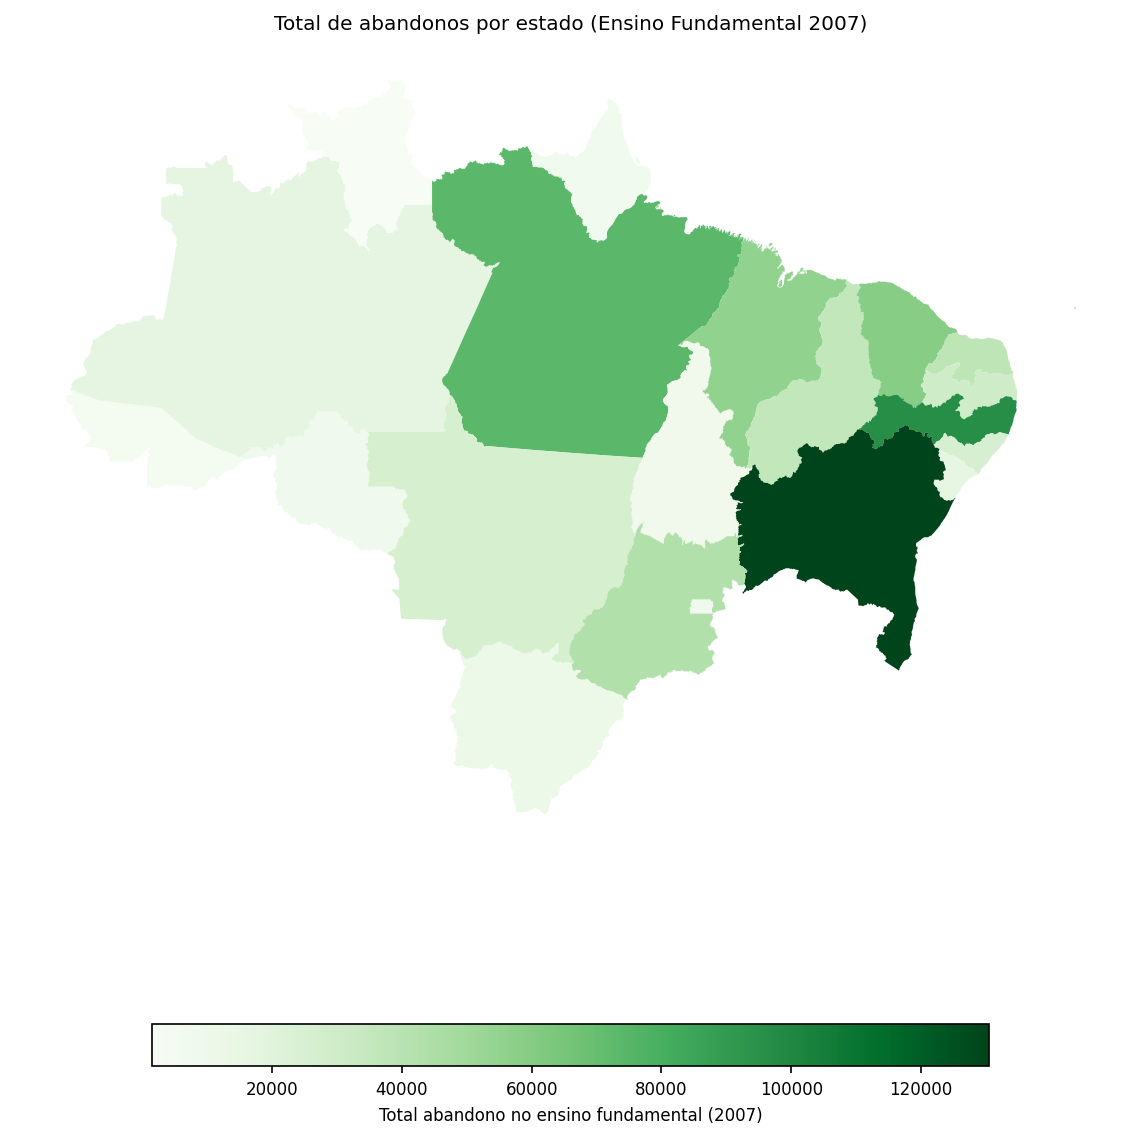

In [4]:
# 1. Carrega os municípios do Brasil (polígonos)
estados = geobr.read_state(year=2018)  # Dados geoespaciais dos municípios


# 2. Carrega os dados de matrículas por município
df_muni = pd.read_csv("Estados2007.csv")

# 3. Padroniza colunas para merge (código IBGE do município)
df_muni["estado"] = df_muni["UF"].str.lower() 
estados["sigla"] = estados["abbrev_state"].str.lower() 


# 4. Merge dos dados geoespaciais com as matrículas
estados = estados.merge(df_muni, left_on="sigla", right_on="estado", how="left")


# 6. Configuração do mapa
plt.rcParams.update({"font.size": 8})
fig, ax = plt.subplots(figsize=(12, 10), dpi=150)


# 7. Plot dos municípios (cor por total de matrículas)
estados.plot(
    column="Resultado_Multiplicacao_EM2007",
    cmap="Greens",
    legend=True,
    legend_kwds={
        "label": "Total abandono no ensino fundamental (2007)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax
)


ax.set_title("Total de abandonos por estado (Ensino Fundamental 2007)")
ax.axis("off")